In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})

## Load MapTask and PhotoBook measurements

In [2]:
mt = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/mt_gpt2-ft_all.csv')
len(mt)


8001

In [3]:
mt_info = mt.loc[mt['move_type'].isin(['instruct', 'explain', 'check', 'query_yn', 'reply_w', 'clarify'])]
len(mt_info)


3708

In [4]:
pb = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pb_gpt2-ft_all.csv')
len(pb)


49012

In [5]:
chains = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pbchains_gpt2-ft_all.csv')
len(chains)


15347

------

# Plots

In [6]:
mt.head()

,dialogue_id,speaker,transaction_number,transaction_type,move_number,move_type,position_in_dialogue,position_in_transaction,duration,text,...,length,tokens_h,tokens,xu_h,mi_dialogue_id,xu_h_dialogue_id,normalised_h_dialogue_id,mi_transaction_number,xu_h_transaction_number,normalised_h_transaction_number
0,q6nc3,g,1,normal,1,ready,1,1,0.3753,right,...,1,[-6.742980003356934],['right'],0.871102,NaN,NaN,NaN,NaN,NaN,NaN
1,q6nc3,g,1,normal,2,query_yn,2,2,3.4730,at the bot-- bottom of the map on the right-ha...,...,21,"[-7.3051958084106445, -0.9586701393127441, -11...","['at', 'Ġthe', 'Ġbot', '--', 'Ġbottom', 'Ġof',...",0.791112,-0.099913,0.900738,3.838463,-0.099913,0.849460,3.838463
2,q6nc3,f,1,normal,1,reply_y,3,3,4.1511,yeah,...,1,[-8.606072425842285],['yeah'],1.111788,0.407965,1.367861,8.198108,0.407965,1.036494,8.198108
3,q6nc3,f,1,normal,2,explain,4,4,1.2849,i've got the starts marked,...,6,"[-6.434814929962158, -1.8309214115142822, -0.6...","['i', ""'ve"", 'Ġgot', 'Ġthe', 'Ġstarts', 'Ġmark...",1.191393,0.132317,1.305971,5.609630,0.132317,1.223815,5.609630
4,q6nc3,g,1,normal,3,acknowledge,5,5,0.7229,right okay,...,2,"[-6.742980003356934, -2.998748540878296]","['right', 'Ġokay']",0.840677,-0.685281,1.078451,5.556146,-0.685281,0.925450,5.556146


## MT dialogues w/ backchannels

228


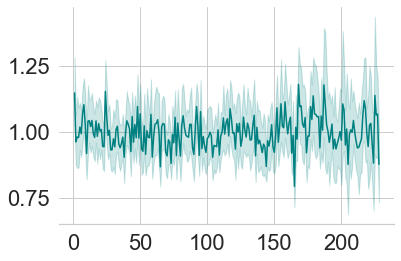

In [8]:
max_pos = mt['position_in_dialogue'].mean() + 1 * mt['position_in_dialogue'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt[mt["position_in_dialogue"] <= max_pos], 
             x="position_in_dialogue", y="xu_h", legend=False, color='teal') 
fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 50))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/mt-backch-ft-dialogue.pdf')

## MT dialogues w/o backchannels

## MT transactions w/ backchannels

### Speaker roles

21


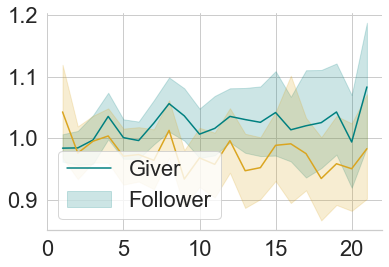

In [10]:
max_pos = mt['position_in_transaction'].mean() + 1 * mt['position_in_transaction'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt[mt["position_in_transaction"] <= max_pos], 
             x="position_in_transaction", y="xu_h", hue='speaker', legend=False,
             palette=['teal', 'goldenrod'])

fig = sns_plot.get_figure()
sns_plot.legend(loc='lower left', labels=['Giver', 'Follower'])
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 5))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/mt-backch-ft-transaction-roles.pdf')

### No speaker roles

224


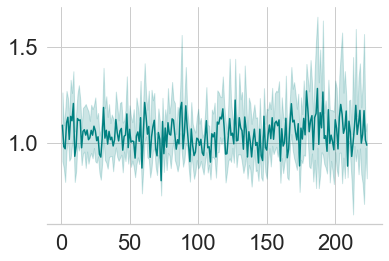

In [9]:
max_pos = mt_info['position_in_dialogue'].mean() + 1 * mt_info['position_in_dialogue'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info[mt_info["position_in_dialogue"] <= max_pos],
             x="position_in_dialogue", y="xu_h", legend=False, color='teal')
fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 50))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/mt-nobackch-ft-dialogue.pdf')

21


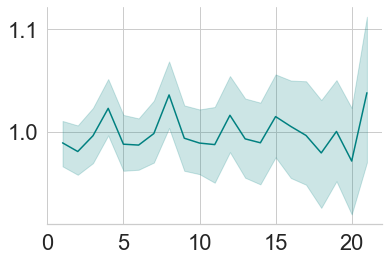

In [11]:
max_pos = mt['position_in_transaction'].mean() + 1 * mt['position_in_transaction'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt[mt["position_in_transaction"] <= max_pos], 
             x="position_in_transaction", y="xu_h", color='teal')

fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 5))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/mt-backch-ft-transaction-noroles.pdf')


## MT transactions w/o backchannels

21


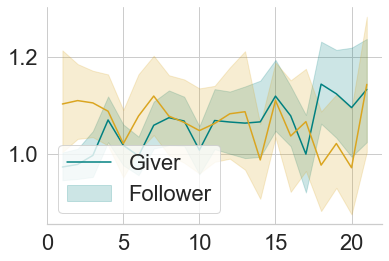

In [12]:
max_pos = mt_info['position_in_transaction'].mean() + 1 * mt_info['position_in_transaction'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info[mt_info["position_in_transaction"] <= max_pos], 
             x="position_in_transaction", y="xu_h", hue='speaker', legend=False,
             palette=['teal', 'goldenrod'])

fig = sns_plot.get_figure()
sns_plot.legend(loc='lower left', labels=['Giver', 'Follower'])
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 5))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/mt-nobackch-ft-transaction-roles.pdf')


### No speaker roles

21


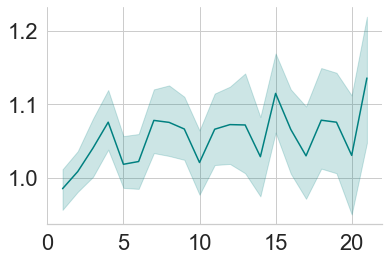

In [13]:
max_pos = mt_info['position_in_transaction'].mean() + 1 * mt_info['position_in_transaction'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info[mt_info["position_in_transaction"] <= max_pos], 
             x="position_in_transaction", y="xu_h", color='teal')

fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 5))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/mt-nobackch-ft-transaction-noroles.pdf')



-----
## PB dialogues

57


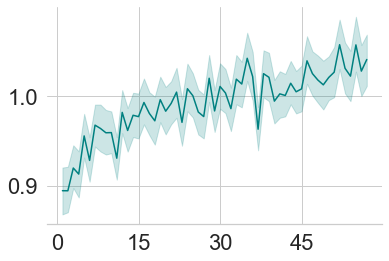

In [14]:
max_pos = pb['position_in_dialogue'].mean() + 1 * pb['position_in_dialogue'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=pb[pb["position_in_dialogue"] <= max_pos], 
             x="position_in_dialogue", y="xu_h", legend=False, color='teal')
fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 15))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/pb-ft-dialogue.pdf')

## PB rounds

13


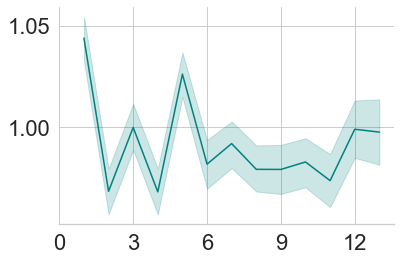

In [15]:
max_pos = pb['position_in_round'].mean() + 1 * pb['position_in_round'].std()
max_pos = math.ceil(max_pos)
print(max_pos)

sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=pb[pb["position_in_round"] <= max_pos], 
             x="position_in_round", y="xu_h", legend=False, color='teal')
fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
sns_plot.set_xticks(np.arange(0, max_pos, 3))
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/pb-ft-round.pdf')

## PB chains

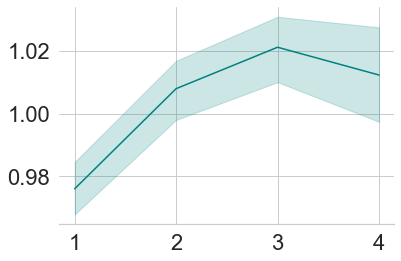

In [16]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=chains, 
             x="position_in_chain", y="xu_h", legend=False, color='teal')
fig = sns_plot.get_figure()
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True)
sns.set(font_scale = 2)
plt.show()
# fig.savefig('/Users/mario/code/erp-paper/emnlp2021/figures/pb-ft-chain.pdf')